# **Lesson 06 : Data Mining Imbalanced Data**

In [1]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 500)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1. Get Data**

In [3]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_name = 'AI Specialist Lesson 06.zip'
path = os.path.join(dataset_path, data_name)

os.mkdir('Lesson 06')
working_dir = os.path.join('/content', 'Lesson 06')
os.chdir(working_dir)

with zipfile.ZipFile(path, 'r') as data_zipfile:
  data_zipfile.extractall(working_dir)

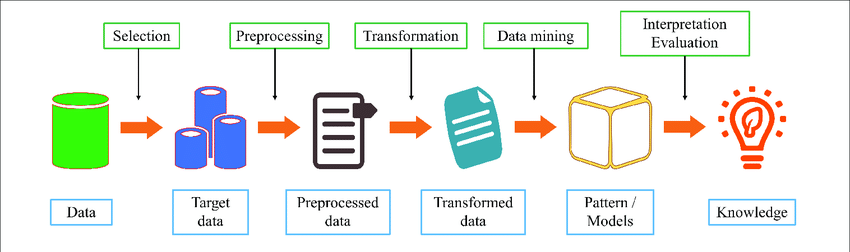

In [4]:
display(Image(filename='AI Specialist Lesson 06/Data Mining Process 01.png'))

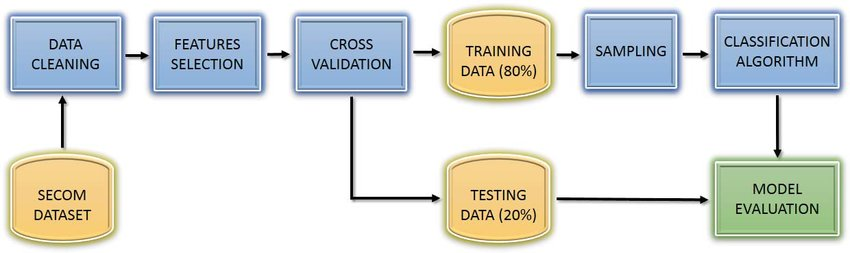

In [5]:
display(Image(filename='AI Specialist Lesson 06/Machine Learning Process.png'))

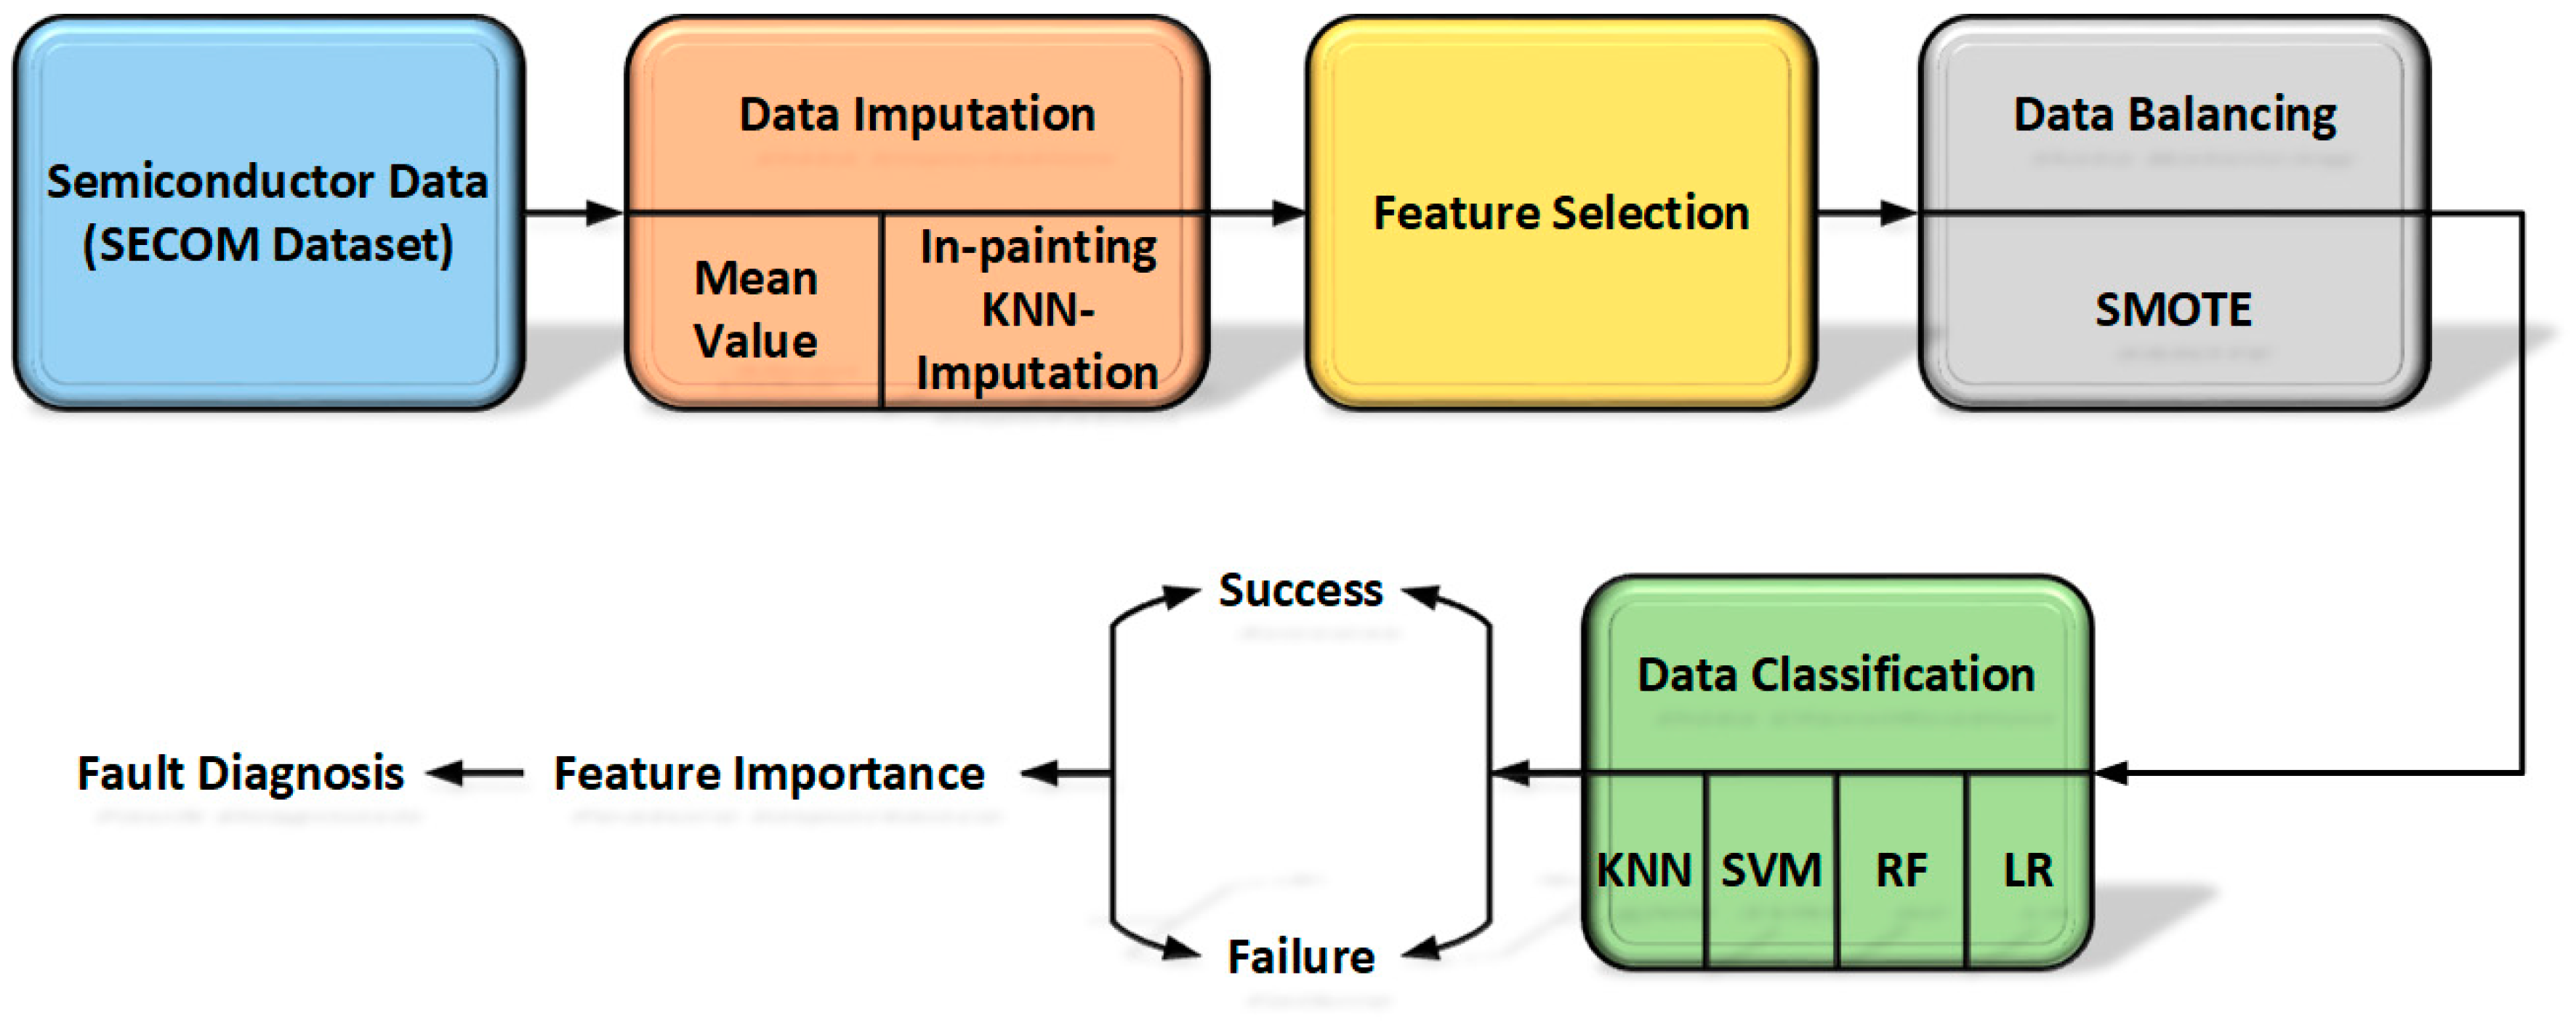

In [6]:
display(Image(filename='AI Specialist Lesson 06/Machine Learning Process 2.png'))

In [345]:
data = pd.read_csv('AI Specialist Lesson 06/uci-secom.csv')
print(data.shape)
display(data.head())

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

### **2. Describe Data**

In [346]:
# Drop bớt cột 'Time' vì cột này không cần thiết
data = data.drop('Time', axis=1)
print(data.shape)

(1567, 591)


In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


In [348]:
data.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,1561.000000,1561.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.000000,549.000000,549.000000,549.000000,852.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.000000,1558.00000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1559.000000,1559.000000,1559.000000,1562.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0

### **3. Data Processing**

##### **3.1 Data Preprocessing**

In [349]:
100*(data.isnull().sum().sort_values(ascending=False)/data.shape[0])

157          91.193363
292          91.193363
293          91.193363
158          91.193363
492          85.577537
               ...    
120           0.000000
156           0.000000
495           0.000000
494           0.000000
Pass/Fail     0.000000
Length: 591, dtype: float64

In [350]:
def find_missing_percent(data):
  miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
  for col in data.columns:
    missing_info = pd.Series({'ColumnName':col, 'TotalMissingVals':data[col].isnull().sum()})
    miss_df = pd.concat([miss_df, missing_info.to_frame().T], ignore_index=True)
  miss_df = miss_df[miss_df['TotalMissingVals']>0].reset_index(drop=True)
  miss_df['PercentMissing'] = 100*(miss_df['TotalMissingVals']/data.shape[0])
  return miss_df
  # reset_index(drop=True): sử dụng để đặt lại chỉ số của DataFrame

In [351]:
miss_df = find_missing_percent(data)
display(miss_df.head())

,ColumnName,TotalMissingVals,PercentMissing
0,0,6,0.382897
1,1,7,0.446713
2,2,14,0.893427
3,3,14,0.893427
4,4,14,0.893427


>Có những column có số lượng missing quá cao, các cột này gần như không có tác dụng cho dù có được xử lý.
* ==> Drop những column có số lượng missing trên 40%

In [352]:
data01 = data.copy()
data01 = data01.drop(miss_df[miss_df['PercentMissing']>40]['ColumnName'], axis=1)
print(data.shape)
print(data01.shape)
miss_df01 = find_missing_percent(data01)
display(miss_df01.head())

(1567, 591)
(1567, 559)


,ColumnName,TotalMissingVals,PercentMissing
0,0,6,0.382897
1,1,7,0.446713
2,2,14,0.893427
3,3,14,0.893427
4,4,14,0.893427


>**Nhận Xét:**
* Trong bài toán phân loại sản phẩm lỗi, việc phân loại 1 sản phẩm lỗi thành đạt là nguy hiểm hơn phân loại 1 sản phẩm đạt thành lỗi rất nhiều. Vì thế ta hướng tới thà phân loại sp đạt thành lỗi.
* Với các giá trị là null nếu cố gắng xử lý sẽ làm tăng tính rủi ro, có thế sp là lỗi nhưng lại được phân loại thành sp đạt.
* ==> Ta sẽ chỉ thay thế các giá trị null thành 0, để cố tình duy trì tính bất thường vốn có.

In [353]:
data01 = data01.replace(np.NaN, 0)

In [354]:
miss_df01 = find_missing_percent(data01)
display(miss_df01)

,ColumnName,TotalMissingVals,PercentMissing


##### **3.2 Imbalanced Data (Under_Sampling)**
* Lấy mẫu ngẫu nhiên các giá trị của majority class 1 lượng bằng số lượng của minority class.


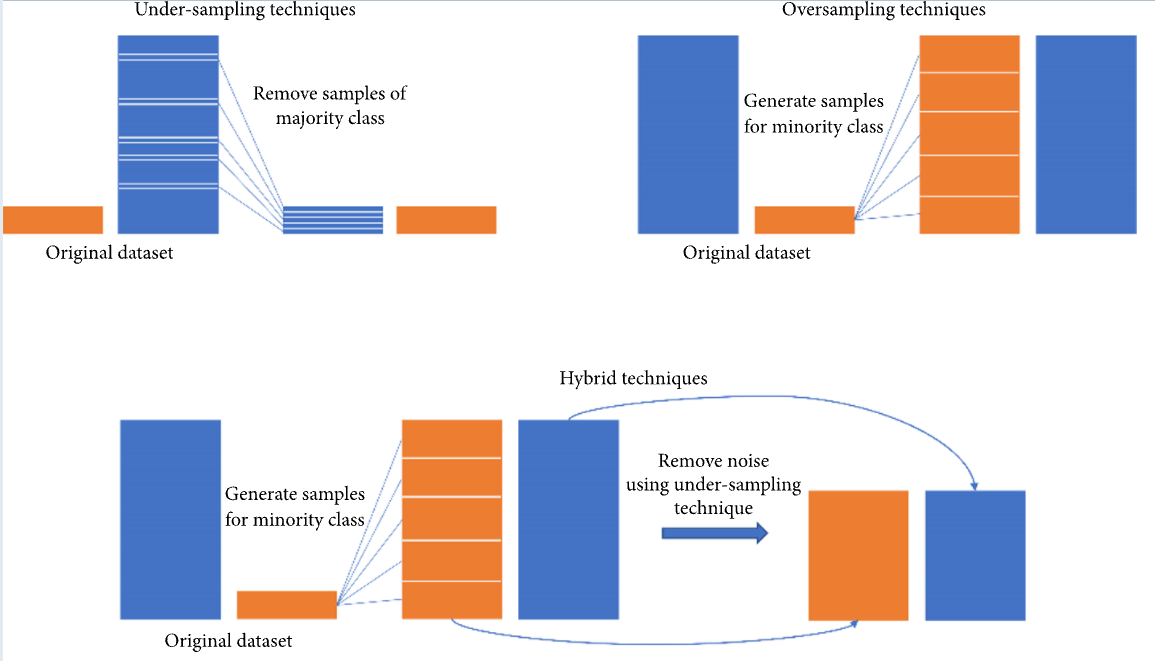

In [355]:
display(Image(filename='AI Specialist Lesson 06/Unbalanced Data.png'))

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

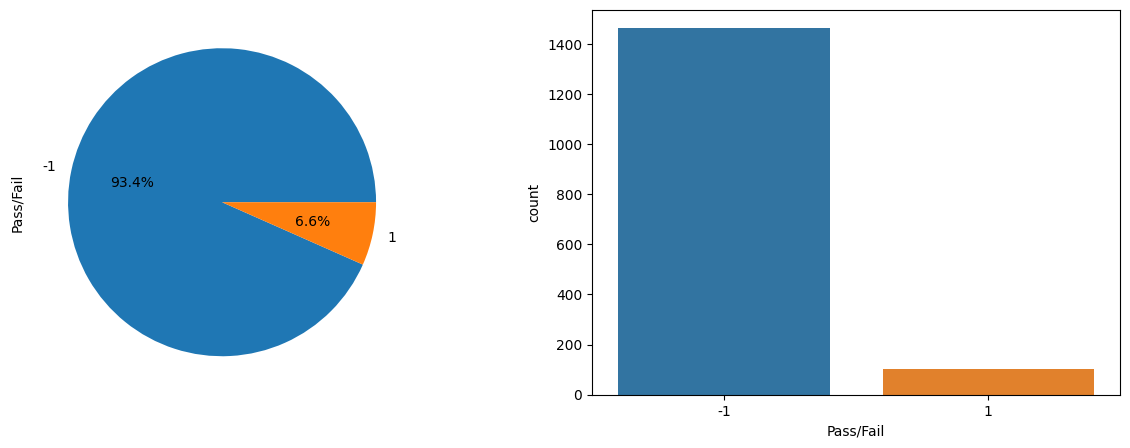

In [356]:
target = 'Pass/Fail'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data01[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data01, x=data01[target])
data01[target].value_counts()

In [357]:
# Under-Sampling Data:
# Lấy mẫu ngẫu nhiên các giá trị của majority class 1 lượng bằng số lượng của minority class
Pass, Fail = -1, 1
data_upsamp = data01.copy()

In [358]:
failed_indices = np.array(data_upsamp[data_upsamp[target] == Fail].index)
num_failed_indices = len(failed_indices)
print(failed_indices)
print(num_failed_indices)

[   2   10   11   14   23   38   40   45   48   49   50   57   58   62
   64   82   96  115  131  154  157  158  167  169  180  182  186  188
  189  218  222  231  235  236  238  240  241  243  244  273  277  282
  291  294  321  323  326  327  336  344  351  368  373  392  406  424
  441  448  495  508  518  576  583  601  605  634  709  795  797  826
  831  871  914  924  926  929 1029 1062 1144 1151 1185 1189 1211 1227
 1238 1241 1242 1254 1302 1303 1324 1325 1327 1328 1329 1342 1343 1363
 1364 1365 1400 1438 1443 1519]
104


In [359]:
normal_indices = np.array(data_upsamp[data_upsamp[target] == Pass].index)
num_normal_indices = len(normal_indices)
print(normal_indices)
print(num_normal_indices)

[   0    1    3 ... 1564 1565 1566]
1463


In [360]:
random_normal_indices = np.random.choice(normal_indices, size=num_failed_indices, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(random_normal_indices)
print(random_normal_indices.shape)

[1530 1455 1025 1483 1202 1198  135  103  474  586 1318 1541 1470 1310
 1251 1453 1094 1244  461  918  253 1491  318  863  657 1249  842  152
  959 1119  643 1096 1271 1335  268 1468 1213  460  878  712  931  913
 1424  562  432 1057 1010  521 1562 1063  558 1162   17  108  343  230
 1511  733  500 1090    3  641 1551 1321  535  682  311 1503 1452  921
  305  267  752  819  754  621  309  686  514 1334  143 1359  870 1066
 1301 1071  788  935  280  759 1034   92  904  675  721   83 1296  680
 1036  731  671 1361  782 1122]
(104,)


In [361]:
under_sampling_indices = np.concatenate([failed_indices, random_normal_indices])
print(len(under_sampling_indices))

208


In [362]:
data_upsamp = data_upsamp.iloc[under_sampling_indices, :]
print(data_upsamp.shape)
display(data_upsamp.head())

(208, 559)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,70.0,364.3782,9.8783,131.8027,734.7924,1.2992,141.0845,1.0,637.2655,185.7574,0.0,4.486,4.748,2936.0,0.9139,0.9447,4.5873,23.8245,364.5364,10.1685,115.6273,11.3019,16.1755,24.2829,710.5095,0.8694,145.8000,1.0,625.9636,84.7681,0.0,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,-0.1134,-0.0182,0.0287,7.1041,0.1362,2.4532,0.9880,1685.8514,0.1497,9317.1698,0.0553,0.0006,-0.0013,0.0000,0.0002,-0.1343,0.0,-0.1427,0.1218,0.0006,-0.0001,0.0134,-0.0026,-0.0016,-0.0006,0.0013,-0.0301,-0.0728,0.9231,0.0,718.5777,0.9899,58.4808,0.6015,0.9772,6.4527,15.90,2.882,15.94,15.95,0.8798,3.094,0.4777,3.272,-0.1892,0.8194,0.9978,2.2592,998.4440,42.0579,89.0,126.4,96.5,45.1001,306.0380,0.3263,0.0,8.33,0.0038,0.0754,0.0483,0.0619,0.0221,8.2660,0.0,4.819,8.443,0.4909,0.0177,8.2054,0.47,0.0497,562.0,788.0,759.0,2100.0,0.187,0.117,0.068,2.1,1.4,0.123,0.319,1.0824,0.0369,0.3141,0.5753,0.3141,0.9677,0.2706,0.326,0.0,0.0,17.78,0.745,13.31,22.912,0.1959,9.21,0.0,17.87,60.110,0.0,0.0,0.0,0.0,0.0,0.0,0.139,5.09,19.75,0.949,9.71,16.73,5.09,11.059,22.624,0.1164,13.30,0.0,16.73,79.618,0.0,0.0339,0.0494,0.0696,0.0406,0.0401,0.0840,0.0349,0.0718,2.4266,0.0014,0.0963,0.0152,182.4956,0.0284,839.6006,0.0,0.0192,0.0170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0062,0.0040,0.0,0.0,0.0,0.0,0.0273,0.0,104.4042,0.0007,4.1446,0.0733,0.0063,0.4166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0487,29.621,3.9133,23.5510,41.3837,32.6256,15.7716,97.3868,0.1117,0.0,2.5274,0.0012,0.0249,0.0152,0.0157,0.0075,2.8705,0.0,1.5306,2.5493,0.1479,0.0059,2.8046,0.1185,0.0167,251.4536,329.64

 1    104
-1    104
Name: Pass/Fail, dtype: int64

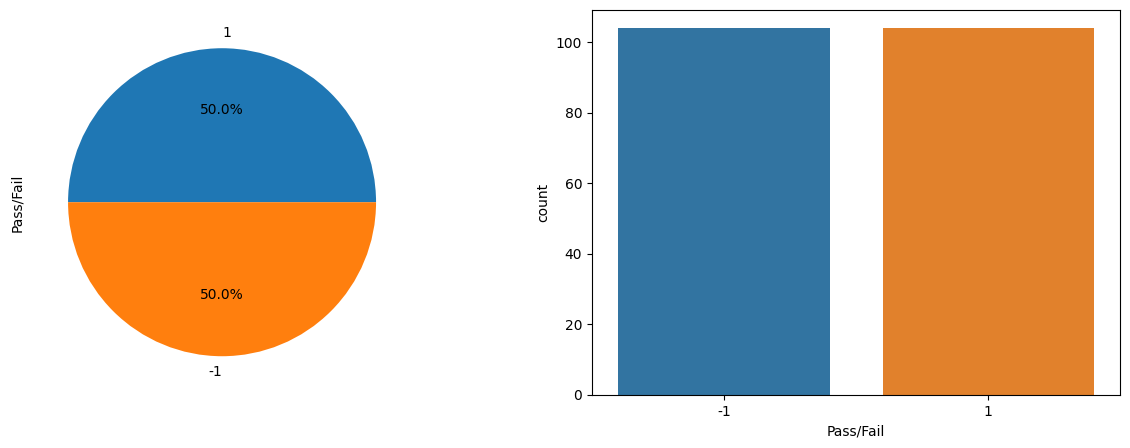

In [363]:
target = 'Pass/Fail'
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data_upsamp[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data_upsamp, x=data_upsamp[target])
data_upsamp[target].value_counts()

##### **3.3 Build Module for Upsampling Data**

In [364]:
data_upsamp[target].value_counts()

 1    104
-1    104
Name: Pass/Fail, dtype: int64

In [365]:
# Pass, Fail = 0, 1
index = data_upsamp[data_upsamp[target] == -1].index
data_upsamp.loc[index, target] = 0
print(data_upsamp[target].value_counts())

1    104
0    104
Name: Pass/Fail, dtype: int64


In [366]:
X_us = data_upsamp.drop([target], axis=1)
y_us = data_upsamp[target]
print(X_us.shape)
print(y_us.shape)

(208, 558)
(208,)


In [367]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.2,random_state=93)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(166, 558)
(166,)
(42, 558)
(42,)


In [368]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

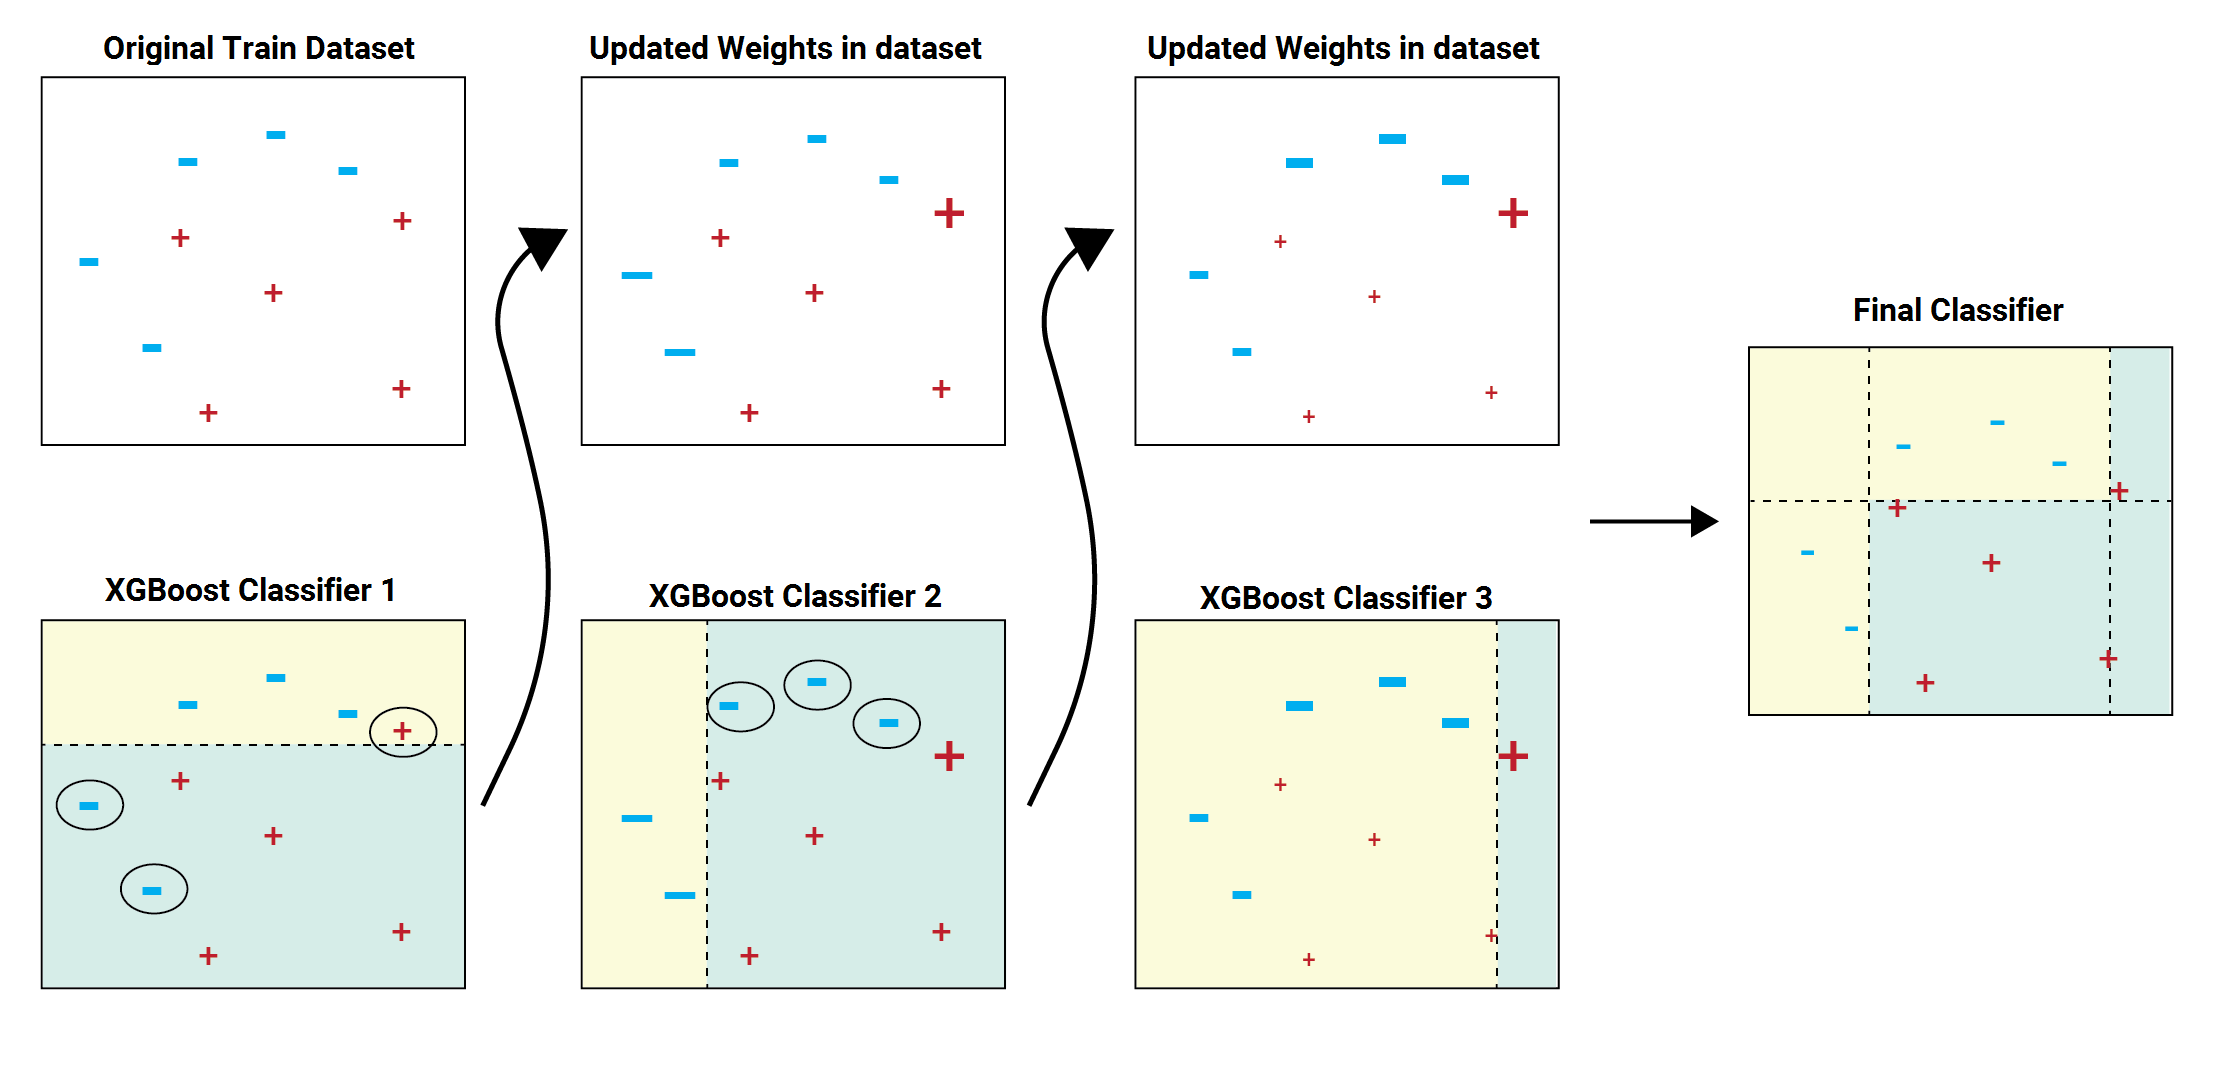

In [369]:
display(Image(filename='AI Specialist Lesson 06/XGBoost.png'))

In [370]:
print(y_train.shape)

(166,)


In [371]:
from xgboost.sklearn import XGBClassifier
model_upsamp = XGBClassifier(eval_metric='logloss')
model_upsamp.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [372]:
y_pred = model_upsamp.predict(X_test_norm)

In [373]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def ConfusionMatrix(y_test, y_pred):
  conf_matrix = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred))

  fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(2, 2), cmap=plt.cm.Accent)
  plt.xlabel('Predictions', fontsize=10)
  plt.ylabel('Actuals', fontsize=10)
  plt.title('Confusion Matrix', fontsize=10)
  plt.show()

              precision    recall  f1-score   support

           0       0.67      0.64      0.65        22
           1       0.62      0.65      0.63        20

    accuracy                           0.64        42
   macro avg       0.64      0.64      0.64        42
weighted avg       0.64      0.64      0.64        42



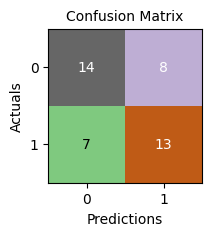

In [374]:
# Pass, Fail = 0, 1
ConfusionMatrix(y_test, y_pred)

>**Nhận Xét:**
* Có 7 sản phẩm là Fail nhưng lại được dự đoán là Pass trong số 42 sample của test set.
* ==> Model chưa tốt.

##### **3.4 Imbalanced Data (Over_Sampling)**
* Sinh thêm sample của minority class để có số lượng bằng với majority class.
* **SMOTE**

In [375]:
# Over-Sampling Data
data_oversamp = data01.copy()

In [376]:
# Pass, Fail = -1, 1
data_oversamp[target].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [377]:
# Pass, Fail = 0, 1
index = data_oversamp[data_oversamp[target] == -1].index
data_oversamp.loc[index, target] = 0
data_oversamp[target].value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

<Axes: xlabel='Pass/Fail', ylabel='count'>

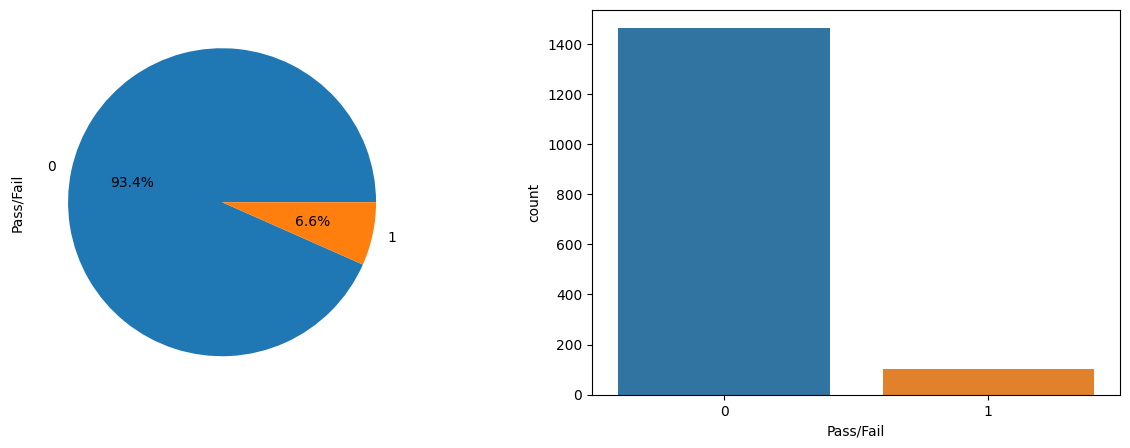

In [378]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data_oversamp[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data_oversamp, x=data_oversamp[target])

In [379]:
X_os = data_oversamp.drop([target], axis=1)
y_os = data_oversamp[target]
print(X_os.shape)
print(y_os.shape)

(1567, 558)
(1567,)


In [380]:
X_os.value_counts().sum()

1567

In [381]:
from imblearn.over_sampling import SMOTE
model_SMOTE = SMOTE(random_state=0)
X_smote, y_smote = model_SMOTE.fit_resample(X_os, y_os)
print(y_smote.value_counts())

0    1463
1    1463
Name: Pass/Fail, dtype: int64


<Axes: xlabel='Pass/Fail', ylabel='count'>

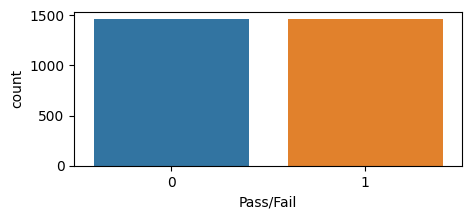

In [382]:
plt.figure(figsize=(5,2))
sns.countplot(x=y_smote)

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=93)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2340, 558)
(2340,)
(586, 558)
(586,)


##### **3.5 Build Module for Oversampling Data**

In [384]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [385]:
from xgboost.sklearn import XGBClassifier
model_oversamp = XGBClassifier(eval_metric='logloss')
model_oversamp.fit(X_train_norm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [386]:
y_pred = model_oversamp.predict(X_test_norm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       282
           1       0.98      0.99      0.98       304

    accuracy                           0.98       586
   macro avg       0.98      0.98      0.98       586
weighted avg       0.98      0.98      0.98       586



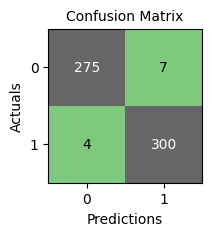

In [387]:
# Pass, Fail = 0, 1
ConfusionMatrix(y_test, y_pred)

>**Nhận Xét:**
* Chỉ có 4 sản phẩm là Fail nhưng lại được dự đoán là Pass trong 586 sample của test set.
* ==> Model có thể sử dụng được.